In [3]:
import pandas as pd
import numpy as np
import os
import env
import acquire
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import sklearn.preprocessing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler

Goal: leave this section with a dataset that is split into train, validate, and test ready to be analyzed. Make sure data types are appropriate and missing values have been addressed, as have any data integrity issues.

Think about the following in this stage:

This might include plotting the distributions of individual variables and using those plots to identify and decide how best to handle any outliers.

You might also identify unit measures to decide how best to scale any numeric data as you see necessary.

Identify erroneous or invalid data that may exist in your dataframe.

Add a data dictionary in your notebook at this point that defines all the fields used in your model and your analysis and answers the question, "Why did you use the fields you used?". e.g. "Why did you use bedroom_field1 over bedroom_field2?", not, "Why did you use number of bedrooms?"

Create a prep.pyfile as the reproducible component that handles missing values, fixes data integrity issues, changes data types, scales data, etc.

In [4]:
df= acquire.get_zillow_data()
df.head()

,parcelid,fips,latitude,longitude,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxamount,taxvaluedollarcnt
0,14297519,6059.0,33634931.0,-117869207.0,4.0,3.5,3100.0,11013.72,1023282.0
1,17052889,6111.0,34449266.0,-119281531.0,2.0,1.0,1465.0,5672.48,464000.0
2,14186244,6059.0,33886168.0,-117823170.0,3.0,2.0,1243.0,6488.30,564778.0
3,12177905,6037.0,34245180.0,-118240722.0,4.0,3.0,2376.0,1777.51,145143.0
4,10887214,6037.0,34185120.0,-118414640.0,3.0,3.0,1312.0,1533.89,119407.0


In [ ]:
df.shape

10857130    3
12612211    3
11991059    3
13083743    3
12402398    2
           ..
14482882    1
13892885    1
10741014    1
11244824    1
14298875    1
Name: parcelid, Length: 77414, dtype: int64

In [5]:
df.fips.value_counts()

6037.0    50697
6059.0    20631
6111.0     6252
Name: fips, dtype: int64

In [14]:
df.isnull().sum()

parcelid                         0
fips                             0
latitude                        34
longitude                       34
bedroomcnt                       0
bathroomcnt                      0
calculatedfinishedsquarefeet     0
taxamount                        0
taxvaluedollarcnt                0
dtype: int64

In [13]:
df['bedroomcnt'].fillna(df['bedroomcnt'].mode()[0], inplace=True)
df['bathroomcnt'].fillna(df['bathroomcnt'].mode()[0], inplace=True)
df['calculatedfinishedsquarefeet'].fillna(df['calculatedfinishedsquarefeet'].mode()[0], inplace=True)
df['fips'].fillna(df['fips'].mode()[0], inplace=True)
df['taxamount'].fillna(df['taxamount'].mode()[0], inplace=True)
df['taxvaluedollarcnt'].fillna(df['taxvaluedollarcnt'].mode()[0], inplace=True)

In [ ]:
df.isnull().sum()

In [17]:
rating = []
for row in df['fips']:
        if row == 6037.0:    rating.append('los_angeles_county')
        elif row == 6059.0:   rating.append('orange_county')
        elif row == 6111.0:  rating.append('ventura_county')
        else:           rating.append('no_county')
df['county']= rating

In [19]:
df.head()

,parcelid,fips,latitude,longitude,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxamount,taxvaluedollarcnt,county
0,14297519,6059.0,33634931.0,-117869207.0,4.0,3.5,3100.0,11013.72,1023282.0,orange_county
1,17052889,6111.0,34449266.0,-119281531.0,2.0,1.0,1465.0,5672.48,464000.0,ventura_county
2,14186244,6059.0,33886168.0,-117823170.0,3.0,2.0,1243.0,6488.30,564778.0,orange_county
3,12177905,6037.0,34245180.0,-118240722.0,4.0,3.0,2376.0,1777.51,145143.0,los_angeles_county
4,10887214,6037.0,34185120.0,-118414640.0,3.0,3.0,1312.0,1533.89,119407.0,los_angeles_county


Text(0, 0.5, 'Count of Tax Value')

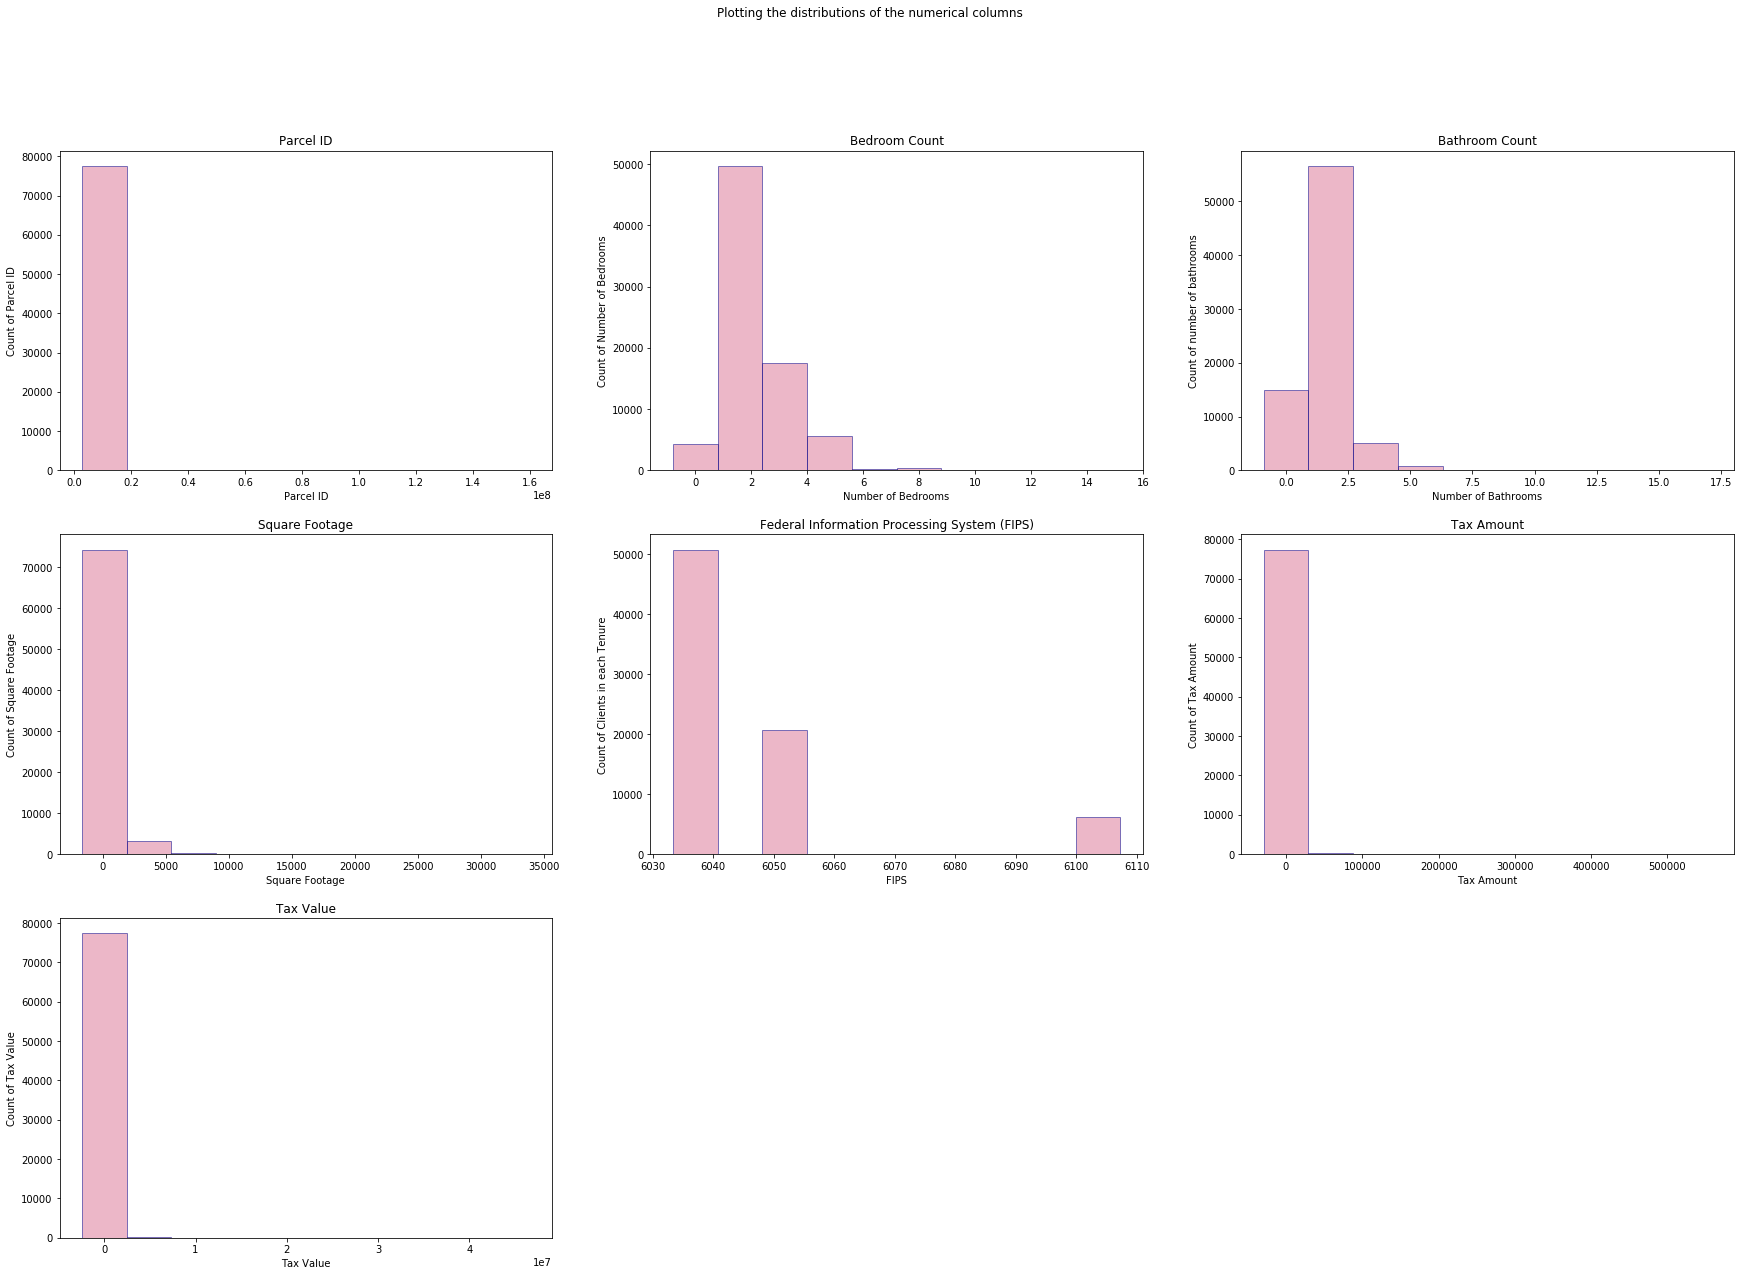

In [20]:
plt.figure(figsize=(30, 20))

plt.suptitle("Plotting the distributions of the numerical columns")
# row, columns, index
plt.subplot(3, 3, 1)
plt.hist(df.parcelid, align='left', edgecolor='darkblue', alpha=0.5, color='palevioletred')
plt.title('Parcel ID')
plt.xlabel("Parcel ID")
plt.ylabel("Count of Parcel ID")


plt.subplot(3, 3, 2)
plt.hist(df.bedroomcnt, align='left', edgecolor='darkblue', alpha=0.5, color='palevioletred')
plt.title('Bedroom Count')
plt.xlabel("Number of Bedrooms")
plt.ylabel("Count of Number of Bedrooms")


plt.subplot(3, 3, 3)
plt.hist(df.bathroomcnt, align='left', edgecolor='darkblue', alpha=0.5, color='palevioletred')
plt.title('Bathroom Count')
plt.xlabel("Number of Bathrooms")
plt.ylabel("Count of number of bathrooms")


plt.subplot(3, 3, 4)
plt.hist(df.calculatedfinishedsquarefeet, align='left', edgecolor='darkblue', alpha=0.5, color='palevioletred')
plt.title('Square Footage')
plt.xlabel("Square Footage")
plt.ylabel("Count of Square Footage")


plt.subplot(3, 3, 5)
plt.hist(df.fips, align='left', edgecolor='darkblue', alpha=0.5, color='palevioletred')
plt.title('Federal Information Processing System (FIPS)')
plt.xlabel("FIPS")
plt.ylabel("Count of Clients in each Tenure")


plt.subplot(3, 3, 6)
plt.hist(df.taxamount, align='left', edgecolor='darkblue', alpha=0.5, color='palevioletred')
plt.title('Tax Amount')
plt.xlabel("Tax Amount")
plt.ylabel("Count of Tax Amount")

plt.subplot(3,3,7)
plt.hist(df.taxvaluedollarcnt, align='left', edgecolor='darkblue', alpha=0.5, color='palevioletred')
plt.title('Tax Value')
plt.xlabel("Tax Value")
plt.ylabel("Count of Tax Value")

In [ ]:
def clean_zillow():
    #get the zillow data
    df= get_zillow_data()
    #handle the nan's
    df['bedroomcnt'].fillna(df['bedroomcnt'].mode()[0], inplace=True)
    df['bathroomcnt'].fillna(df['bathroomcnt'].mode()[0], inplace=True)
    df['calculatedfinishedsquarefeet'].fillna(df['calculatedfinishedsquarefeet'].mode()[0], inplace=True)
    df['fips'].fillna(df['fips'].mode()[0], inplace=True)
    df['taxamount'].fillna(df['taxamount'].mode()[0], inplace=True)
    df['taxvaluedollarcnt'].fillna(df['taxvaluedollarcnt'].mode()[0], inplace=True)
    # make new column for county names
    rating = []
    for row in df['fips']:
        if row == 6037.0:    rating.append('los_angeles_county')
        elif row == 6059.0:   rating.append('orange_county')
        elif row == 6111.0:  rating.append('ventura_county')
        else:           rating.append('no_county')
    df['county']= rating
    #rename columns to make it easier to call later
    df= df.rename(columns={"bedroomcnt": "bedroom_count","bathroomcnt": "bathroom_count",
                      "calculatedfinishedsquarefeet": "square_feet", "taxamount": "tax_amount", "taxvaluedollarcnt": "tax_value")
                      })
    # drop unneeded columns
    df= df.drop(columns=["Unnamed: 0", "parcelid"])
    # return the clean dataframe
    return df

In [ ]:
def prep_zillow_data():
    '''This function takes in the cleaned zillow data and returns a train, validate, and test data sets.'''
    df= clean_zillow()
    train_validate, test = train_test_split(df, test_size=.2, random_state=123)
    train, validate = train_test_split(train_validate, test_size=.3, random_state=123) 
    return train, validate, test

In [ ]:
def prep_split_zillow_data():
    '''This function takes in the clean data, drops the tax amount for modeling purposes and then splits the data into X/Y Train, Validate/Test.'''
    df=clean_zillow()
    df= df.drop(columns='taxamount')
    X_train = train.drop(columns='tax_value')
    X_validate = validate.drop(columns='tax_value')
    X_test = test.drop(columns='tax_value')

    y_train = train['tax_value']
    y_validate = validate['tax_value']
    y_test = test['tax_value']
    return X_train, X_validate, X_test, y_train, y_validate, y_test